# Методы машинного обучения. Рубежный контроль №1
## Выполнил: Плешаков Владислав ИУ5-25М
## Вариант 8

Задача для группы:
Для произвольной колонки данных построить парные диаграммы (pairplot)

Задача 8:
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения модой.

Задача 28:
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе межквартильного размаха.

In [27]:
# Подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="ticks")

В качестве набора данных будет использован набор, содержащий информацию о пригодности воды для питья

In [2]:
# Загрузка набора данных
data = pd.read_csv("water_potability.csv")
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
data.shape

(3276, 10)

## Построение парных диаграмм

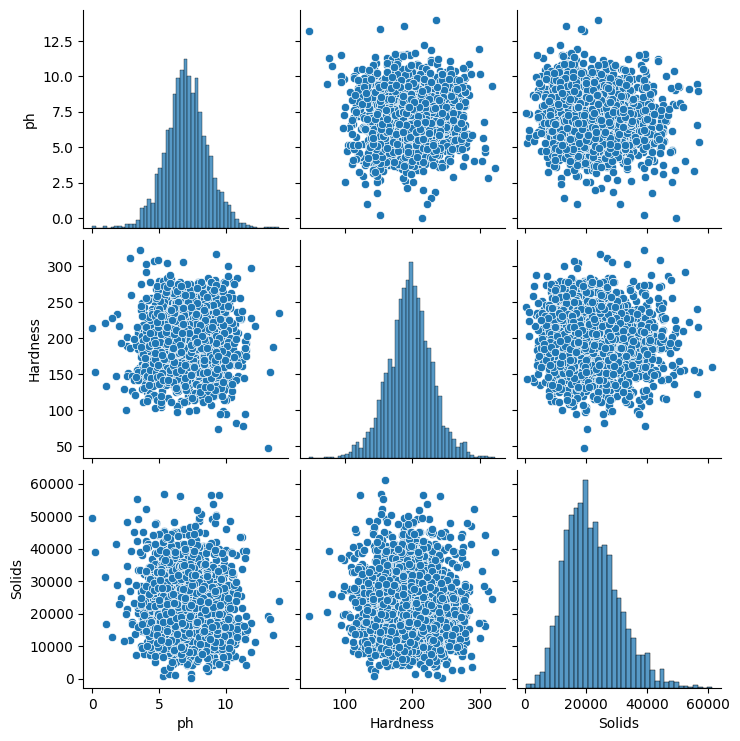

In [4]:
# Построение парных диаграмм (для первых трех колонок)
sns.pairplot(data=data.iloc[:,0:3])

Из этого графика видно, что особой корреляции между первыми тремя колонками нет

## Устранение пропусков

Для начала посмотрим, в каких колонках у нас есть пропуски

In [5]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na

['ph', 'Sulfate', 'Trihalomethanes']

In [6]:
# Количество пропусков
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('ph', 491), ('Sulfate', 781), ('Trihalomethanes', 162)]

Будем заполнять пропуски в колонке Trihalomethanes ([Тригалометаны](https://hmn.wiki/ru/Trihalomethane)), т.к. их там меньше всего, и соответственно, мы не так сильно повлияем на зависимости между данными

In [7]:
temp_data = data[['Trihalomethanes']].values
size = temp_data.shape[0]
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(temp_data)

imputer = SimpleImputer(strategy="most_frequent")
all_data = imputer.fit_transform(temp_data)

missed_data = temp_data[mask_missing_values_only]
filled_data = all_data[mask_missing_values_only]

In [8]:
filled_data

array([0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738,
       0.738, 0.738,

<Axes: ylabel='Density'>

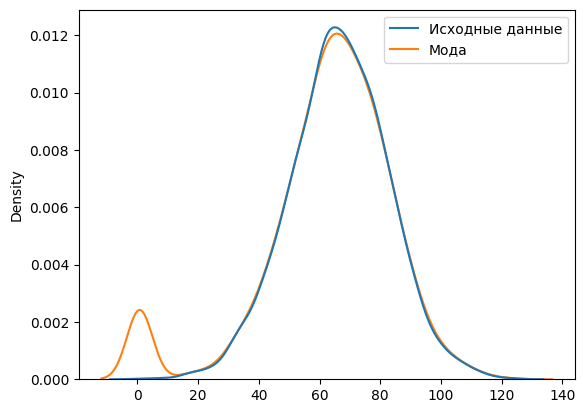

In [9]:
sns.kdeplot(data=pd.DataFrame({'Исходные данные':temp_data.reshape((size,)),
                               'Мода':all_data.reshape((size,))}))

## Обработка выбросов

In [28]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

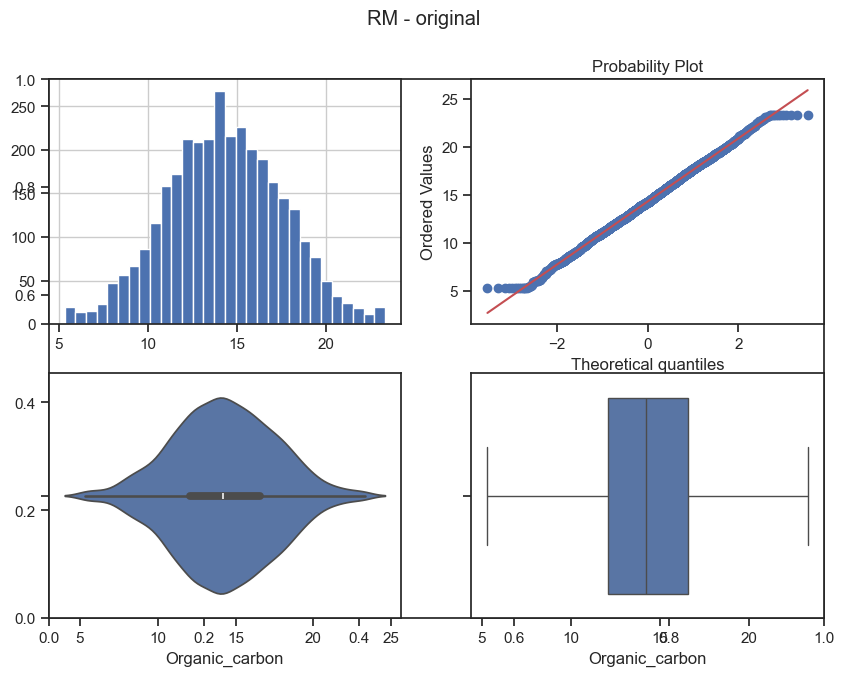

In [29]:
diagnostic_plots(data, 'Organic_carbon', 'RM - original')

Обработаем выбросы в колонке Organic carbon

In [25]:
K2 = 1.5
col = 'Organic_carbon'
IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
lower_boundary = data[col].quantile(0.25) - (K2 * IQR)
upper_boundary = data[col].quantile(0.75) + (K2 * IQR)

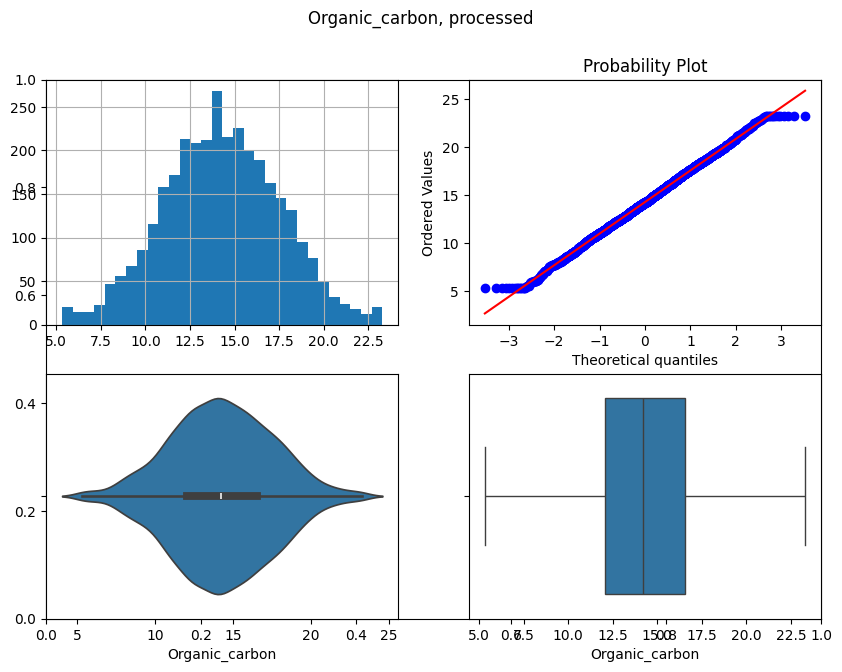

In [26]:
data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
title = 'Organic_carbon, processed'
diagnostic_plots(data, col, title)